# SENTIMENT ANALYSIS OF CURRENT TECH JOB MARKET IN THE US  

## Name : Akhila Sakiramolla (asakiram@iu.edu)

## UID : 2000886005

## Importing required libraries

In [55]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from collections import Counter
import plotly.graph_objects as go
import nltk
nltk.download('punkt')
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
import string
import re
import textblob
from textblob import TextBlob
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer() 
from PIL import Image
import warnings
%matplotlib inline

[nltk_data] Downloading package punkt to C:\Users\Akhila
[nltk_data]     Sakiramolla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Extracting tweets data from June 2022 to November 2022

In [2]:
filter_text = ' -is:retweet -filter:links -filter:replies lang:en '
t = dt.timedelta(days=1)
queries = []
for i in range(6,12):
    for j in range(1,29):
        start_date = dt.date(2022,i,j)
        end_date = start_date+t
        queries.append(filter_text +'since:' + str(start_date) + ' until:' + str(end_date))
        
base_query = 'tech recession OR tech layoff'
queries1 = [base_query + ' ' + q for q in queries]

In [3]:
queries_06 = queries1[0:28]
queries_07 = queries1[28:56]
queries_08 = queries1[56:84]
queries_09 = queries1[84:112]
queries_10 = queries1[112:140]
queries_11 = queries1[140:145]

In [4]:
tweets = []
tweets_df = pd.DataFrame()
for q in queries_06:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
        if i>200:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])

tweets_df_06 = pd.DataFrame(tweets, columns = ['Date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
tweets_df_06.shape

(487, 7)

In [5]:
tweets = []
tweets_df = pd.DataFrame()
for q in queries_07:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
        if i>200:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])

tweets_df_07 = pd.DataFrame(tweets, columns = ['Date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
tweets_df_07.shape

(338, 7)

In [6]:
tweets = []
tweets_df = pd.DataFrame()
for q in queries_08:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
        if i>200:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])

tweets_df_08 = pd.DataFrame(tweets, columns = ['Date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
tweets_df_08.shape

(281, 7)

In [7]:
tweets = []
tweets_df = pd.DataFrame()
for q in queries_09:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
        if i>200:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])

tweets_df_09 = pd.DataFrame(tweets, columns = ['Date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
tweets_df_09.shape

(160, 7)

In [8]:
tweets = []
tweets_df = pd.DataFrame()
for q in queries_10:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
        if i>200:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])

tweets_df_10 = pd.DataFrame(tweets, columns = ['Date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
tweets_df_10.shape

(247, 7)

In [9]:
tweets = []
tweets_df = pd.DataFrame()
for q in queries_11:
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
        if i>200:
            break
        else:
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])

tweets_df_11 = pd.DataFrame(tweets, columns = ['Date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
tweets_df_11.shape

(528, 7)

In [10]:
tweets_df_06 = tweets_df_06.sample(n = 150)
tweets_df_06.shape

(150, 7)

In [11]:
tweets_df_07 = tweets_df_07.sample(n = 150)
tweets_df_07.shape

(150, 7)

In [12]:
tweets_df_08 = tweets_df_08.sample(n = 150)
tweets_df_08.shape

(150, 7)

In [13]:
tweets_df_09 = tweets_df_09.sample(n = 150)
tweets_df_09.shape

(150, 7)

In [14]:
tweets_df_10 = tweets_df_10.sample(n = 150)
tweets_df_10.shape

(150, 7)

In [15]:
tweets_df_11 = tweets_df_11.sample(n = 150)
tweets_df_11.shape

(150, 7)

In [16]:
tweets_df = pd.concat([tweets_df_06, tweets_df_07, tweets_df_08, tweets_df_09, tweets_df_10, tweets_df_11], ignore_index=True)
tweets_df.shape

(900, 7)

In [17]:
tweets_df['Date'].min(), tweets_df['Date'].max()

(Timestamp('2022-06-01 10:46:40+0000', tz='UTC'),
 Timestamp('2022-11-05 22:26:49+0000', tz='UTC'))

In [18]:
tweets_df.drop_duplicates(inplace = True) 
tweets_df.shape

(900, 7)

In [57]:
tweets_df.to_csv('tweets_data.csv')

In [56]:
tweets_df.head(10)

Date        username               source  \
0 2022-06-03 23:46:50+00:00      tommatzzie   Twitter for iPhone   
1 2022-06-14 21:52:11+00:00      joshuajhun      Twitter Web App   
2 2022-06-02 14:27:54+00:00      djparker25              Echofon   
3 2022-06-16 01:29:06+00:00    blacktechbae   Twitter for iPhone   
4 2022-06-04 01:35:21+00:00      TiredOcean      Twitter Web App   
5 2022-06-08 16:33:11+00:00       philgomes      Twitter Web App   
6 2022-06-11 00:26:03+00:00     BenignoVito   Twitter for iPhone   
7 2022-06-14 14:38:14+00:00          sh3ffb   Twitter for iPhone   
8 2022-06-15 19:35:26+00:00      jaaybaybay  Twitter for Android   
9 2022-06-14 15:05:17+00:00  themichnkansah      Twitter for Mac   

                         location  \
0   Washington, DC & Bethesda, MD   
1           San Diego, California   
2                                   
3                      Abundance💫   
4                                   
5  Views my own, from everywhere.   
6                                   
7                                   
8                Toronto, Ontario   
9                           🇬🇧/🇬🇭   

                                               tweet  num_of_likes  \
0  Hearing about tech layoffs is, of course, sad ...             2   
1  Anyone else nervous about all these tech layof...             1   
2  Seeing a lot of these tech companies and start...             0   
3  What is going on? I opened #linkedin seeing st...             0   
4  kind of sucks that the tech industry seems to ...             1   
5  1 / Free Story Idea 🧵 -- \n\nAs tech companies...             0   
6  Tech layoffs here . The tech wreck is going to...             1   
7  all these companies doing layoffs has me soo h...             0   
8  If these layoffs aren't a sign to go for what ...             0   
9  You really don’t feel the impact of the layoff...             0   

   num_of_retweet       Date1  Month  \
0               0  2022-06-03      6   
1               0  2022-06-14      6   
2               0  2022-06-02      6   
3               1  2022-06-16      6   
4               0  2022-06-04      6   
5               0  2022-06-08      6   
6               3  2022-06-11      6   
7               0  2022-06-14      6   
8               1  2022-06-15      6   
9               0  2022-06-14      6   

                                      cleaned_tweets   score sentiment  
0  hearing about tech layoffs is of course sad fo...  0.9548  Positive  
1  anyone else nervous about all these tech layof... -0.0772  Negative  
2  seeing a lot of these tech companies and start...  0.0000   Neutral  
3  what is going on i opened linkedin seeing stra...  0.2263  Positive  
4  kind of sucks that the tech industry seems to ... -0.2462  Negative  
5    free story idea 🧵  as tech companies announc...  0.5106  Positive  
6  tech layoffs here  the tech wreck is going to ... -0.8417  Negative  
7  all these companies doing layoffs has me soo h...  0.5693  Positive  
8  if these layoffs arent a sign to go for what y... -0.1255  Negative  
9  you really don’t feel the impact of the layoff... -0.3182  Negative

In [20]:
tweets_df['Date1'] = pd.to_datetime(tweets_df['Date']).dt.date
tweets_df['Month'] = tweets_df['Date'].dt.month
tweets_df['Month'].value_counts()

6     150
7     150
8     150
9     150
10    150
11    150
Name: Month, dtype: int64

## Data preprocessing

In [21]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

tweets_df['cleaned_tweets'] = tweets_df['tweet'].apply(lambda x:clean_text(x))

## Visualising stop words

In [28]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

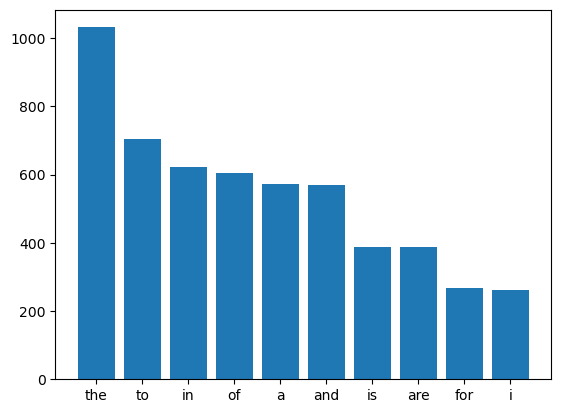

In [29]:
plot_top_stopwords_barchart(tweets_df['cleaned_tweets'])

In [37]:
corpus = tweets_df['cleaned_tweets']
vec = CountVectorizer().fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = words_freq[:20]

<AxesSubplot:title={'center':'Top 20 words in tweets before removing stop words'}, xlabel='tweet'>

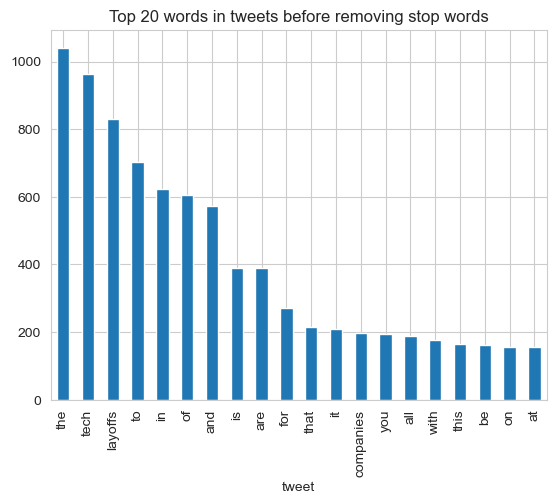

In [38]:
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words in tweets before removing stop words')

## Removal of stop words 

In [39]:
top_N = 100
a = tweets_df['tweet'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

## Top 10 most frequently used words after removing stop words

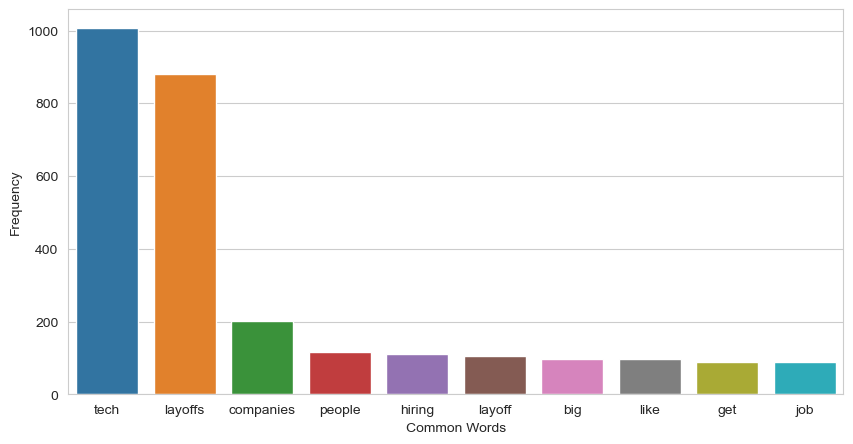

In [40]:
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Common Words', 'Frequency'])

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.barplot(x="Common Words",y="Frequency", data=rslt.head(10))

## Top 10 bigrams in tweets after removing stop words

In [41]:
corpus = tweets_df['cleaned_tweets']
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
common_words = words_freq[:10]

df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 10 bigrams in tweets text after removing stop words and lemmatization"))
fig.show()

## Sentiment Analysis

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(tweets_df['cleaned_tweets'])):
    score = analyser.polarity_scores(tweets_df['cleaned_tweets'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
tweets_df['score']=pd.Series(np.array(scores))
tweets_df['sentiment']=pd.Series(np.array(sentiment))

In [43]:
tweets_df['sentiment'].value_counts()

Positive    380
Negative    357
Neutral     163
Name: sentiment, dtype: int64

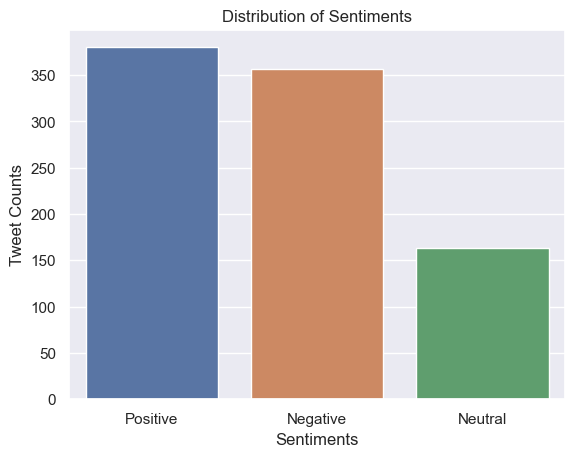

In [44]:
sns.set(style='darkgrid')
sns.countplot(x = 'sentiment',
              data = tweets_df,
              order = tweets_df['sentiment'].value_counts().index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Tweet Counts')
plt.show()


In [45]:
tweets_df.groupby('sentiment').agg({'score':'mean'})

score
sentiment          
Negative  -0.439218
Neutral    0.000345
Positive   0.515483

In [46]:
df = tweets_df.groupby(['Month', 'sentiment']).agg({'score':'mean'}).unstack()
df.round(2)

score                 
sentiment Negative Neutral Positive
Month                              
6            -0.42    -0.0     0.53
7            -0.47     0.0     0.53
8            -0.45     0.0     0.49
9            -0.42     0.0     0.51
10           -0.44    -0.0     0.44
11           -0.44     0.0     0.58

In [47]:
tweets_df.groupby(['Month', 'sentiment']).agg({'tweet':'count'}).unstack()

tweet                 
sentiment Negative Neutral Positive
Month                              
6               66      27       57
7               63      22       65
8               56      29       65
9               54      27       69
10              54      39       57
11              64      19       67

In [48]:
dod_tweets = tweets_df.groupby(['Date1', 'sentiment']).agg({'cleaned_tweets':'count'}).reset_index()
dod_tweets.head()

Date1 sentiment  cleaned_tweets
0  2022-06-01  Negative               1
1  2022-06-01   Neutral               1
2  2022-06-02  Negative               2
3  2022-06-02   Neutral               1
4  2022-06-02  Positive               1

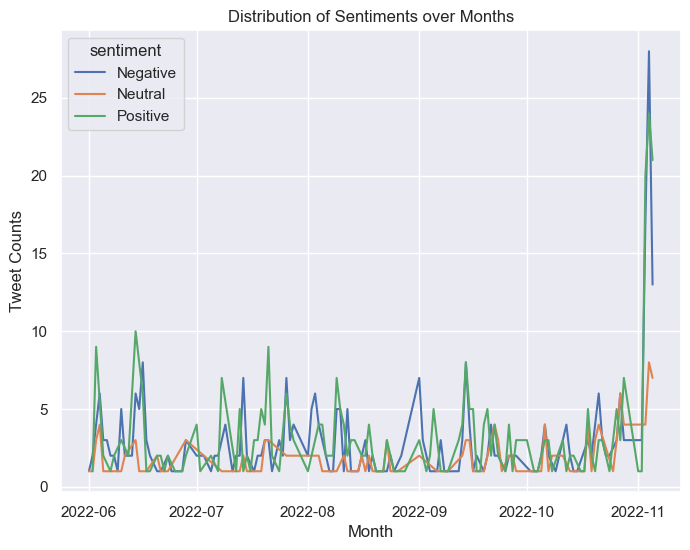

In [49]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Date1", y="cleaned_tweets", hue="sentiment", markers=True, data=dod_tweets, sort=True)
plt.title('Distribution of Sentiments over Months')
plt.xlabel('Month')
plt.ylabel('Tweet Counts')
plt.show()

In [50]:
mom_tweets = tweets_df.groupby(['Month', 'sentiment']).agg({'cleaned_tweets':'count'}).reset_index()
mom_tweets.head()

Month sentiment  cleaned_tweets
0      6  Negative              66
1      6   Neutral              27
2      6  Positive              57
3      7  Negative              63
4      7   Neutral              22

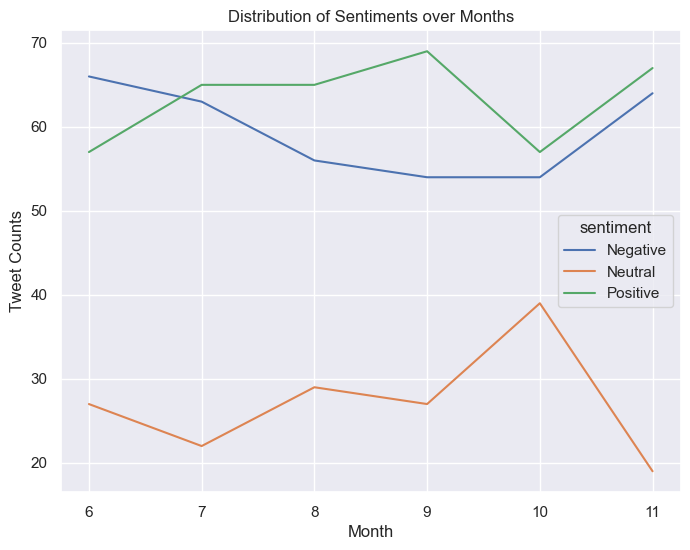

In [51]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="cleaned_tweets", hue="sentiment", markers=True, data=mom_tweets, sort=True)
plt.title('Distribution of Sentiments over Months')
plt.xlabel('Month')
plt.ylabel('Tweet Counts')
plt.show()

Positive words


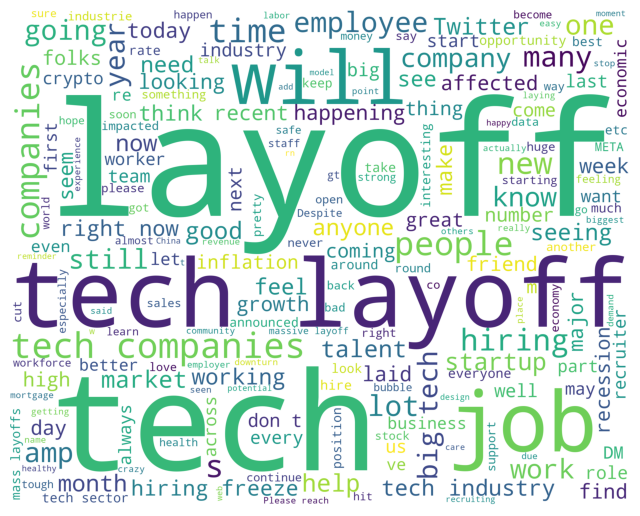

Negative words


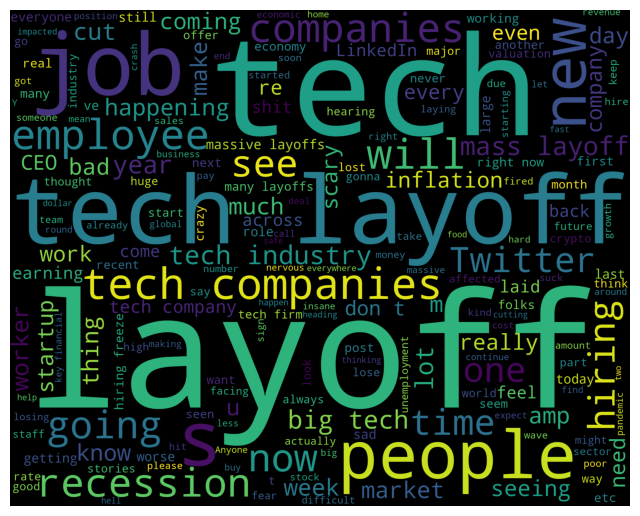

In [54]:
train_pos = tweets_df[tweets_df['sentiment'] == 'Positive']
train_pos = train_pos['tweet']
train_neg = tweets_df[tweets_df['sentiment'] == 'Negative']
train_neg = train_neg['tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)